Lets go through the experiment of using naive bayes for text classification.
We will use scikit learn library to train the naive bayes model. 

# Problem Statement

**Classify the Financial Consumer Complaints into different Product Categories given consumer complaint text.**

**Product Categories**

Credit reporting, repair, or other
Debt collection
Student loan
Money transfer, virtual currency, or money service
Bank account or service

Training Data
[Kaggle: Consumer Complaint Database](https://www.kaggle.com/selener/consumer-complaint-database)

In [1]:
import pandas as pd 

In [2]:
complaints_training_dataset = pd.read_csv('consumer_complaints_training_dataset.csv')

In [4]:
complaints_training_dataset.tail()

,Product,Complaint_text
19995,Bank account or service,"In XXXX of XXXX, I had an insurance claim for ..."
19996,Bank account or service,Ive received a number of collection calls from...
19997,Bank account or service,I have had an existing business debit Paypal a...
19998,Bank account or service,Recently I closed my checking account with U.S...
19999,Bank account or service,I stopped in the branch to check on auto loan ...


In [5]:
complaints_training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product         20000 non-null  object
 1   Complaint_text  20000 non-null  object
dtypes: object(2)
memory usage: 312.6+ KB


In [6]:
complaints_training_dataset.Product.unique()

array(['Credit reporting, repair, or other', 'Debt collection',
       'Student loan',
       'Money transfer, virtual currency, or money service',
       'Bank account or service'], dtype=object)

In [10]:
complaints_training_dataset\
    .groupby('Product')[['Complaint_text']]\
    .count()\
    .rename(columns={'Complaint_text': 'Count'})\
    .sort_values('Count', ascending=False)

,Count
Product,
Bank account or service,4000
"Credit reporting, repair, or other",4000
Debt collection,4000
"Money transfer, virtual currency, or money service",4000
Student loan,4000


In [15]:
temp = complaints_training_dataset['Complaint_text'].value_counts()

In [20]:
temp[temp>2].shape 

(9,)

# Preprocessing + Feature Engineering

**Bag of Words**

Simple technique to convert collection of text documents to a matrix of token counts. 

CountVectorizer is the implementaiton of this technique in SKLearn which provides alot of parameters for tunning.


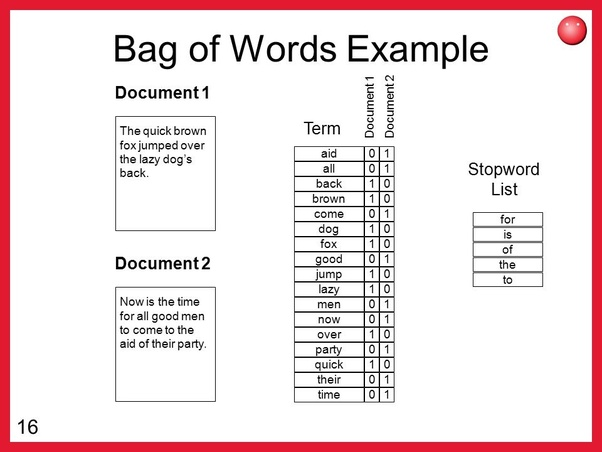


In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

RANDOM_STATE = 19 # seed value 

# CountVectorizer Examples

In [23]:
example_dataset = [
    "Today is Thursday.",
    "Second session of Machine Learning Series",
    "Machine Learning uses Stats methods to learn from data. Stats is awesome",
]

In [24]:
example_vectorizer = CountVectorizer(binary=False, stop_words='english')
transformed_data = example_vectorizer.fit_transform(example_dataset)

In [25]:
print(example_vectorizer.get_feature_names())

['awesome', 'data', 'learn', 'learning', 'machine', 'methods', 'second', 'series', 'session', 'stats', 'thursday', 'today', 'uses']


In [31]:
print(transformed_data.toarray())

[[0 0 0 0 0 0 0 0 0 0 1 1 0]
 [0 0 0 1 1 0 1 1 1 0 0 0 0]
 [1 1 1 1 1 1 0 0 0 2 0 0 1]]


In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    complaints_training_dataset['Complaint_text'],
    complaints_training_dataset['Product'],
    test_size=.2,
    stratify=complaints_training_dataset['Product'],
    random_state = RANDOM_STATE)

In [33]:
binary_count_vectorizer = CountVectorizer(binary=True, stop_words='english')
X_train_binary_count_vectorizer = binary_count_vectorizer.fit_transform(X_train)
X_test_binary_count_vectorizer = binary_count_vectorizer.transform(X_test)

In [35]:
X_train_binary_count_vectorizer.toarray()[0]

array([0, 0, 0, ..., 0, 0, 0])

In [38]:
binary_count_vectorizer.get_feature_names()[:10]

['00', '000', '0001', '001', '0010', '00109', '004', '00i', '01', '014']

In [39]:
list(binary_count_vectorizer.vocabulary_.items())[:10]

[('xxxx', 23870),
 ('account', 1264),
 ('listed', 12934),
 ('credit', 5847),
 ('report', 18089),
 ('experian', 8616),
 ('paid', 15420),
 ('closed', 4699),
 ('2007', 316),
 ('like', 12884)]

In [40]:
from sklearn.naive_bayes import MultinomialNB 

In [42]:
nb_classifer = MultinomialNB()
nb_classifer.fit(X_train_binary_count_vectorizer, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [43]:
nb_classifer.class_count_

array([3200., 3200., 3200., 3200., 3200.])

In [44]:
nb_classifer.class_log_prior_

array([-1.60943791, -1.60943791, -1.60943791, -1.60943791, -1.60943791])

In [45]:
nb_classifer.feature_count_

array([[1.598e+03, 7.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [4.690e+02, 5.000e+00, 0.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [9.350e+02, 7.000e+00, 0.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [1.679e+03, 1.900e+01, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.248e+03, 4.100e+01, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00]])

In [46]:
nb_classifer.feature_log_prob_

array([[ -4.95098841, -10.24868058, -12.32812212, ..., -12.32812212,
        -12.32812212, -12.32812212],
       [ -5.82451152, -10.18548475, -11.97724422, ..., -11.28409704,
        -11.97724422, -11.97724422],
       [ -5.23795246, -10.00012639, -12.07956794, ..., -12.07956794,
        -11.38642076, -12.07956794],
       [ -4.85719732,  -9.28801412, -12.2837464 , ..., -12.2837464 ,
        -12.2837464 , -12.2837464 ],
       [ -5.22129019,  -8.61371908, -11.65824152, ..., -12.3513887 ,
        -12.3513887 , -11.65824152]])

In [47]:
nb_classifer.feature_log_prob_.shape

(5, 24253)

# Model Evaluation
**Cross Validation**

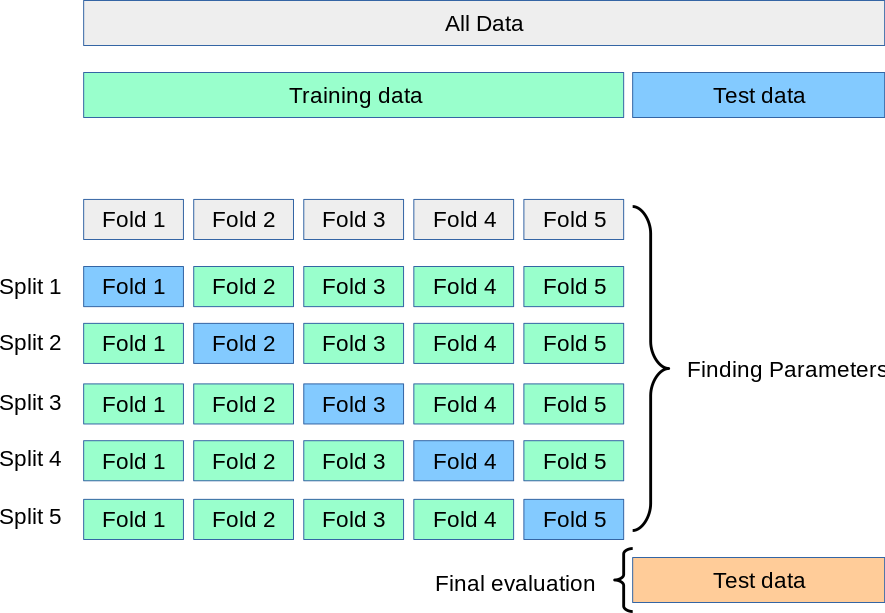


In [48]:
from sklearn.model_selection import cross_val_score

In [49]:
cv_scores = cross_val_score(nb_classifer, X_train_binary_count_vectorizer, y_train, cv=5)
print(cv_scores.mean())
print(cv_scores)

0.8534375000000001
[0.8603125 0.8578125 0.845625  0.8590625 0.844375 ]


# Quality Metrics
* Accuracy Score
* Confusion Metrics

In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [51]:
predictions = nb_classifer.predict(X_test_binary_count_vectorizer)

In [52]:
accuracy_score(y_test, predictions)

0.84675

In [53]:
conf_matrix = confusion_matrix(y_test, predictions, labels=y_test.unique())
conf_matrix

array([[682,  19,  12,  68,  19],
       [ 22, 637,  42,   8,  91],
       [  9,  23, 732,  10,  26],
       [107,   6,   6, 679,   2],
       [ 23,  82,  28,  10, 657]])

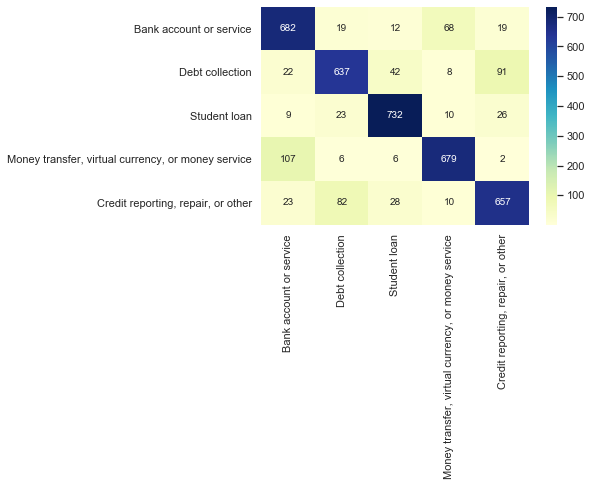

In [56]:
import seaborn as sns;
sns.set()

import matplotlib.pyplot as plt
%matplotlib inline
sns.heatmap(conf_matrix,
            cmap='YlGnBu',
            annot=True,
            fmt="d",
            xticklabels=y_test.unique(),
            yticklabels=y_test.unique())